In [2]:
# importing the libaries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [40]:
df = pd.read_csv("output.csv") # load the dataset

In [41]:
df.head(10) # display top 10 rows

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
df['Liked'].value_counts() # number of samples per class

Liked
1    500
0    500
Name: count, dtype: int64

In [44]:
df.isnull().sum() # missing values

 Review    0
Liked      0
dtype: int64

In [45]:
df.duplicated().sum() # check duplicate rows

np.int64(4)

In [46]:
df = df.drop_duplicates()

In [47]:
df["review_length"]=df[" Review"].apply(len) #Review text length distribution

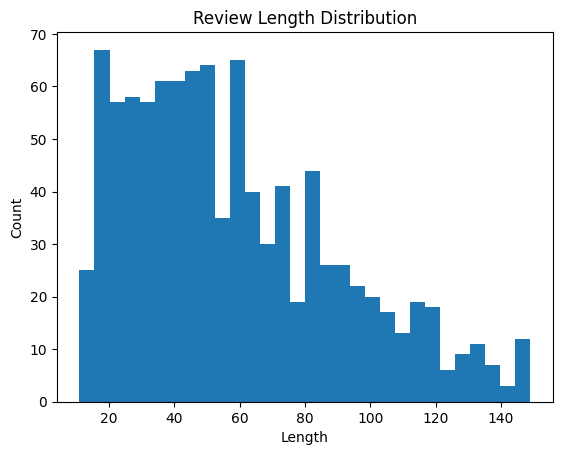

In [48]:
plt.hist(df['review_length'], bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

In [49]:
import re

In [50]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [51]:
df['clean_review'] = df[' Review'].apply(clean_text)

In [52]:
y = df["Liked"] # target variable
X = df["clean_review"] # input variable

In [53]:
# TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# splitting the data into training 80% and testing 20%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('model', BernoulliNB())
])

In [57]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vectorizer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [58]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [59]:
# Testing 

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score of testing :", accuracy_score(y_test, y_pred))
print("Precision score of testing :", precision_score(y_test, y_pred))
print("Recall score of testing :", recall_score(y_test, y_pred))
print("F1 score of testing :", f1_score(y_test, y_pred))

Accuracy score of testing : 0.76
Precision score of testing : 0.7346938775510204
Recall score of testing : 0.7659574468085106
F1 score of testing : 0.75


In [61]:
# training

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy score of training :", accuracy_score(y_train, y_pred_train))
print("Precision score of training :", precision_score(y_train, y_pred_train))
print("Recall score of training :", recall_score(y_train, y_pred_train))
print("F1 score of training :", f1_score(y_train, y_pred_train))

Accuracy score of training : 0.949748743718593
Precision score of training : 0.9334916864608076
Recall score of training : 0.9703703703703703
F1 score of training : 0.9515738498789347


In [63]:
from sklearn.metrics import confusion_matrix,classification_report
con_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",con_mat)
print("Classification Report of testing:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[80 26]
 [22 72]]
Classification Report of testing:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       106
           1       0.73      0.77      0.75        94

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [64]:
import pickle
pickle.dump(pipeline, open("model.pkl", "wb"))
print("Model saved successfully as model.pkl")


Model saved successfully as model.pkl
